In [4]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("creditcard.csv")

In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# toplam veri adeti
df.size

8829017

In [14]:
df.loc[[10, 100, 1000]]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
100,68.0,1.156939,0.037215,0.556799,0.519507,-0.479754,-0.352714,-0.222487,0.158242,0.011252,...,-0.182662,-0.612268,0.197305,0.174883,0.032497,0.099480,-0.026816,0.004199,2.69,0
1000,756.0,-1.372406,0.920122,-0.776930,0.900529,0.743475,-0.958746,0.525096,0.059402,-0.169125,...,-0.023181,0.513865,0.526689,-0.436925,-0.390496,-0.356481,0.187411,0.193365,2.69,0


In [15]:
# kolonlarda boş değerler var mı
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
# ortalama
df.mean()

Time      9.481386e+04
V1        1.168375e-15
V2        3.416908e-16
V3       -1.379537e-15
V4        2.074095e-15
V5        9.604066e-16
V6        1.487313e-15
V7       -5.556467e-16
V8        1.213481e-16
V9       -2.406331e-15
V10       2.239053e-15
V11       1.673327e-15
V12      -1.247012e-15
V13       8.190001e-16
V14       1.207294e-15
V15       4.887456e-15
V16       1.437716e-15
V17      -3.772171e-16
V18       9.564149e-16
V19       1.039917e-15
V20       6.406204e-16
V21       1.654067e-16
V22      -3.568593e-16
V23       2.578648e-16
V24       4.473266e-15
V25       5.340915e-16
V26       1.683437e-15
V27      -3.660091e-16
V28      -1.227390e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64

In [12]:
# veri seti matris boyutu
df.ndim

2

In [17]:
# veri tekrarı
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.corr

<bound method DataFrame.corr of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

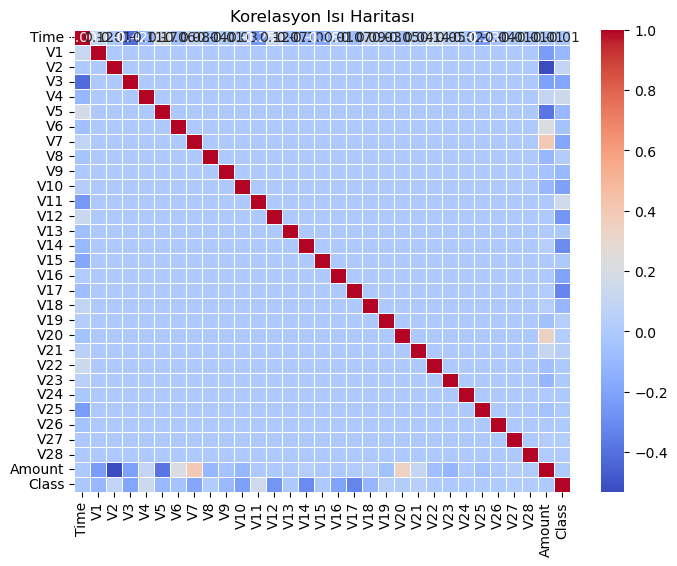

In [20]:
# Korelasyon matrisi
correlation_matrix = df.corr()

# Korelasyon ısı haritası
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasyon Isı Haritası')
plt.show()

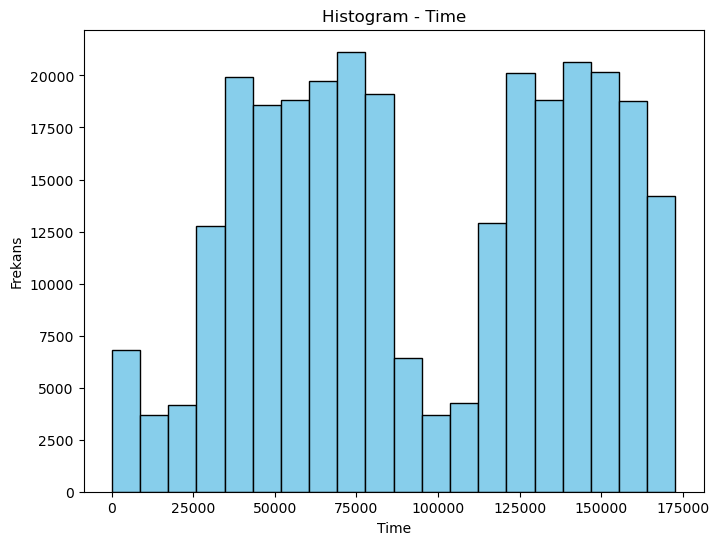

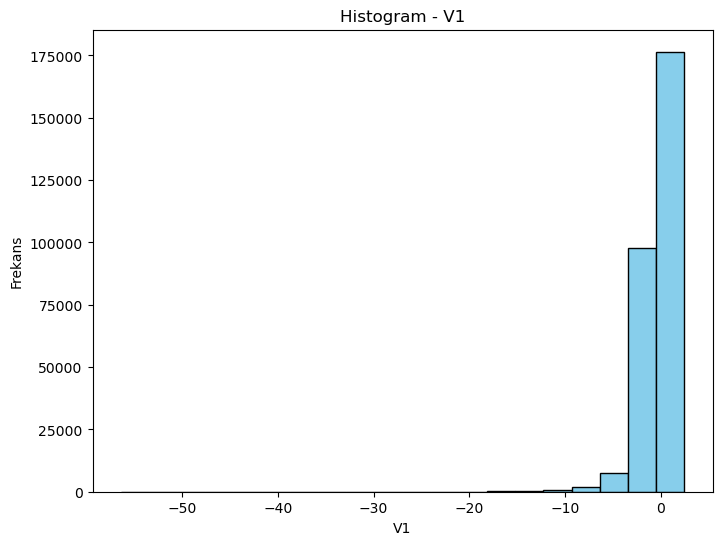

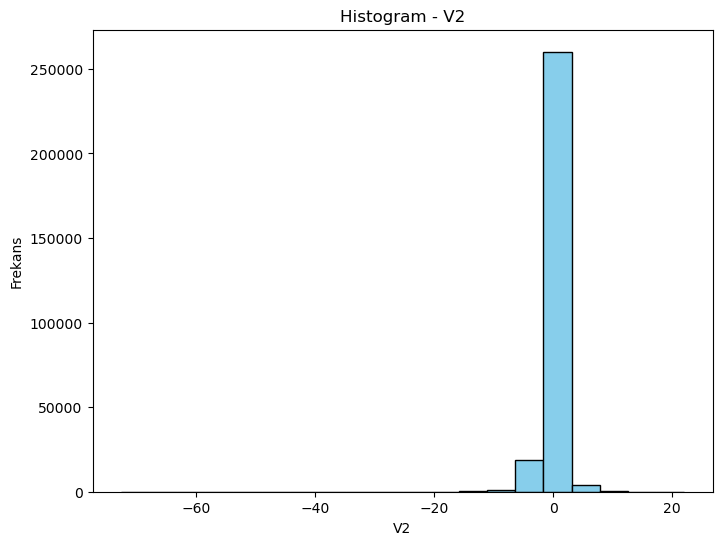

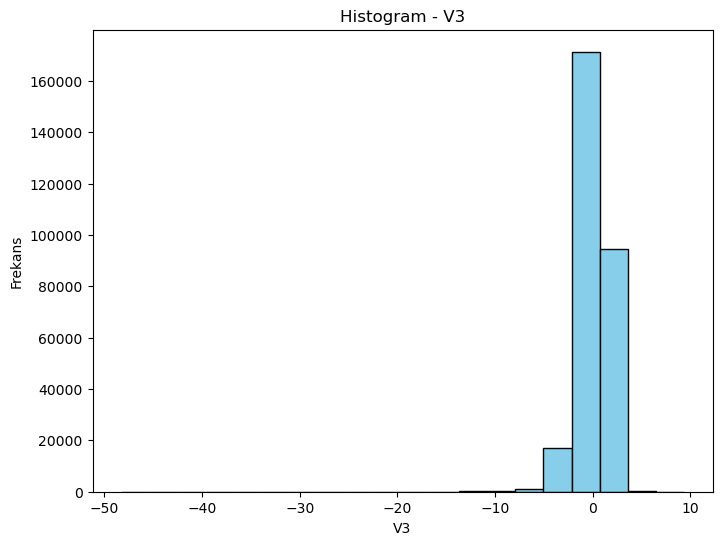

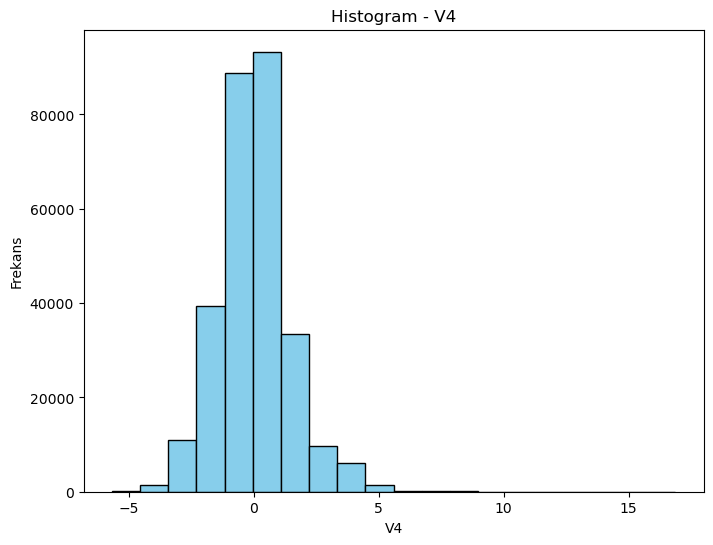

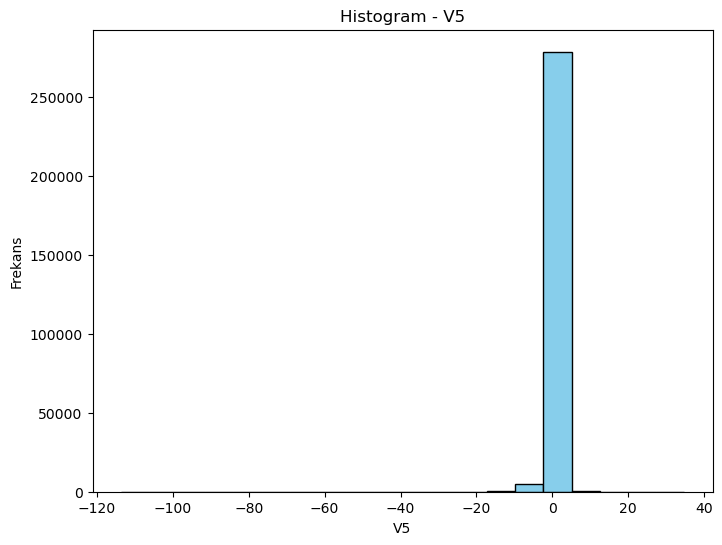

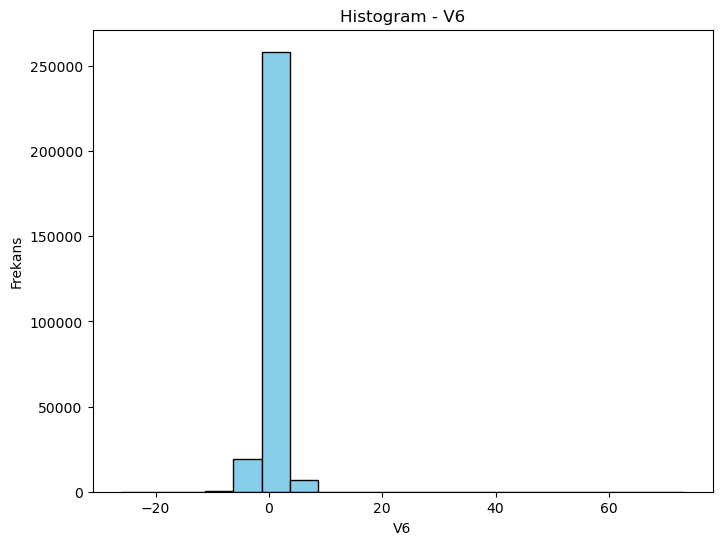

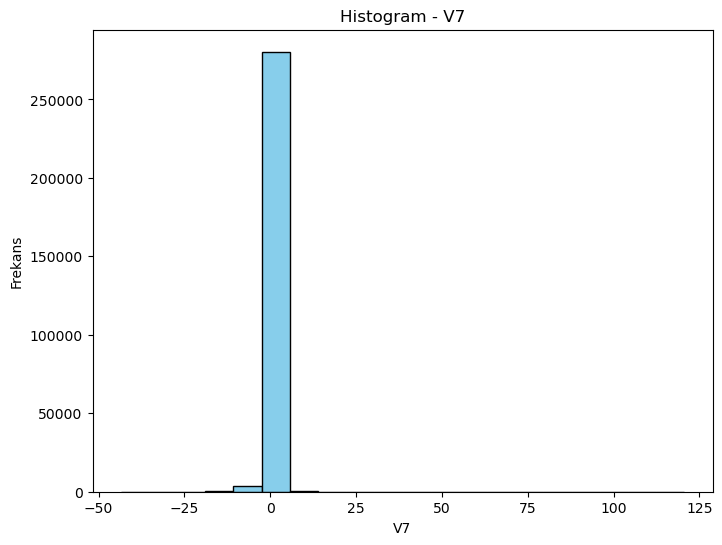

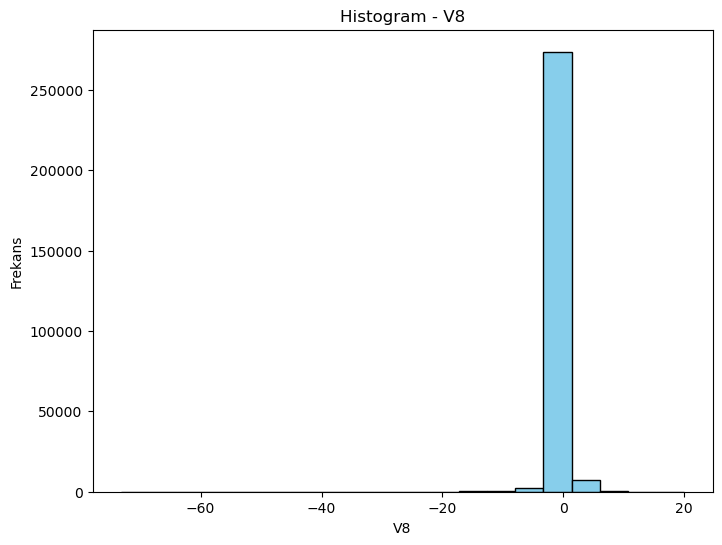

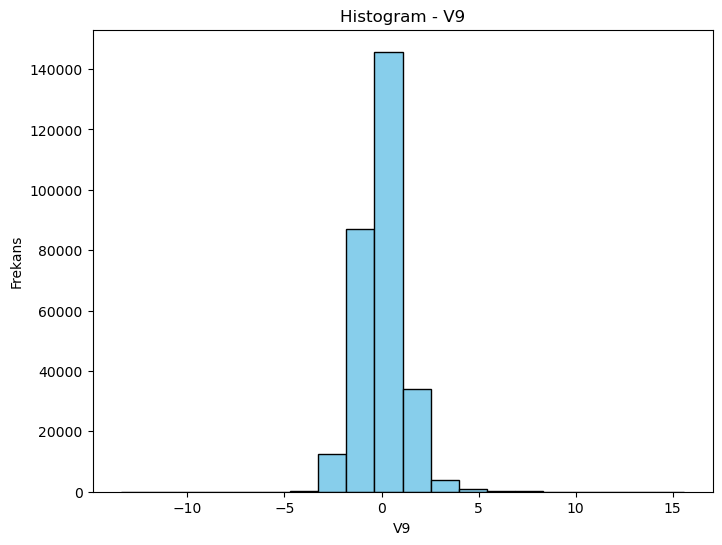

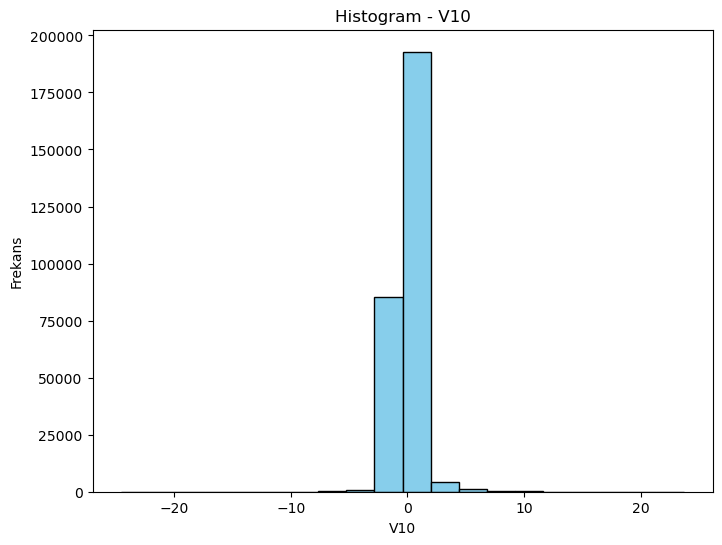

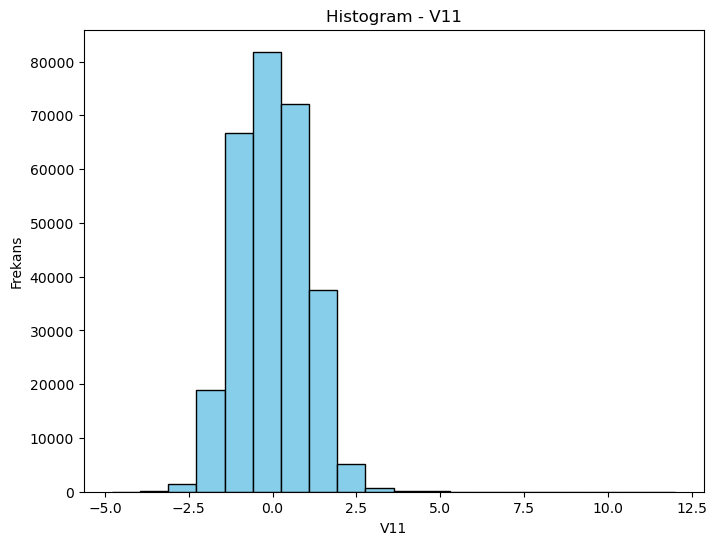

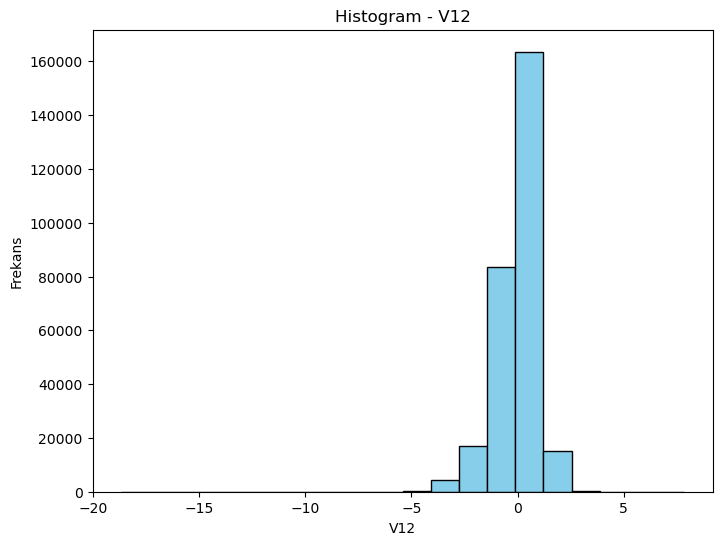

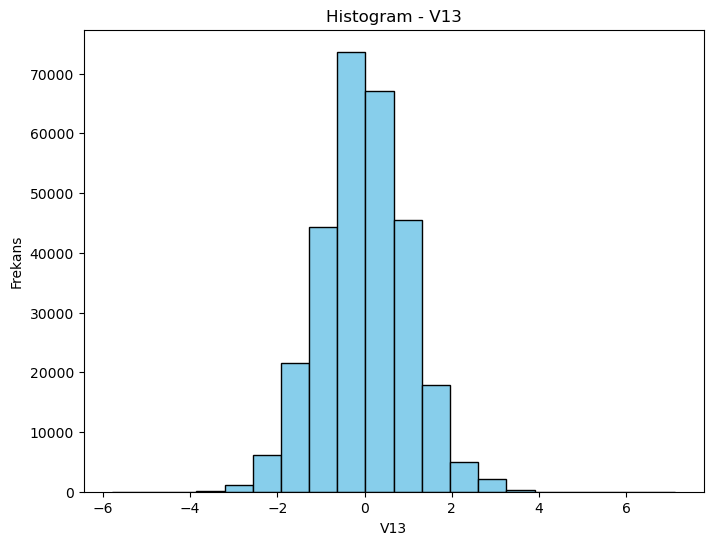

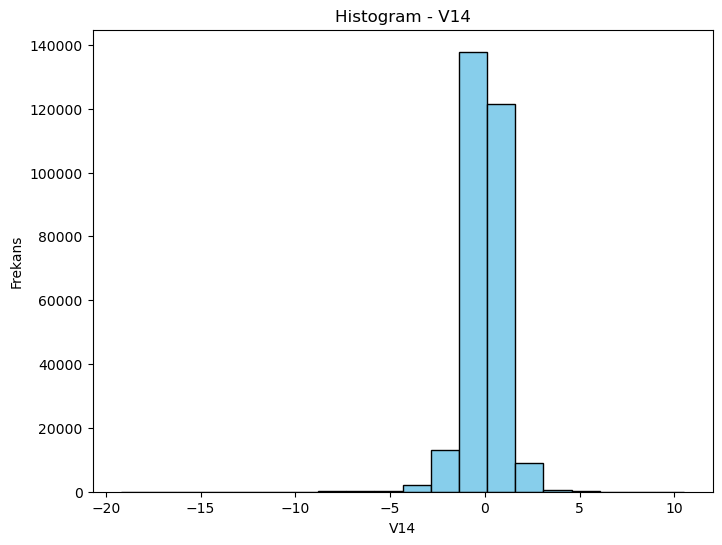

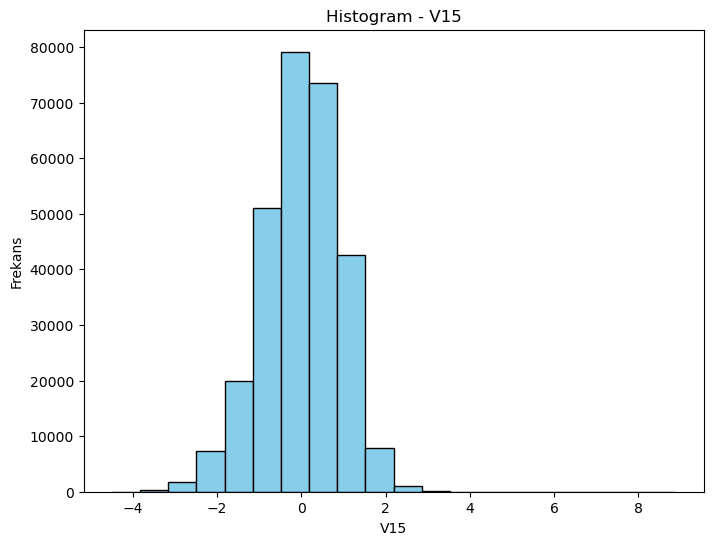

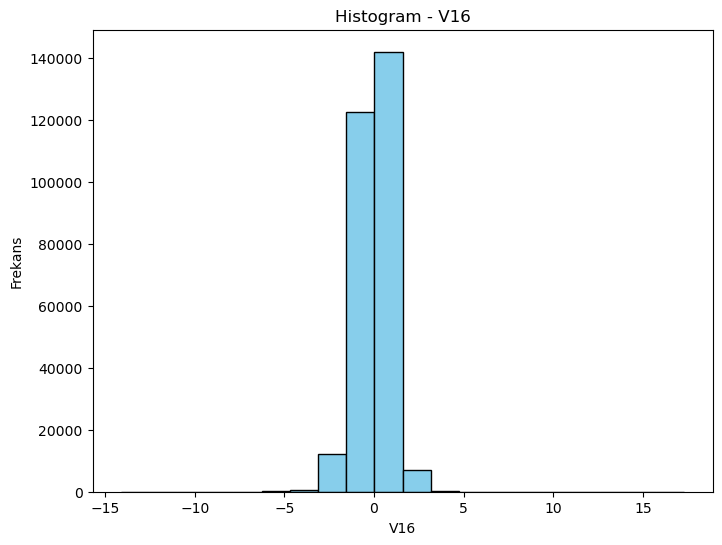

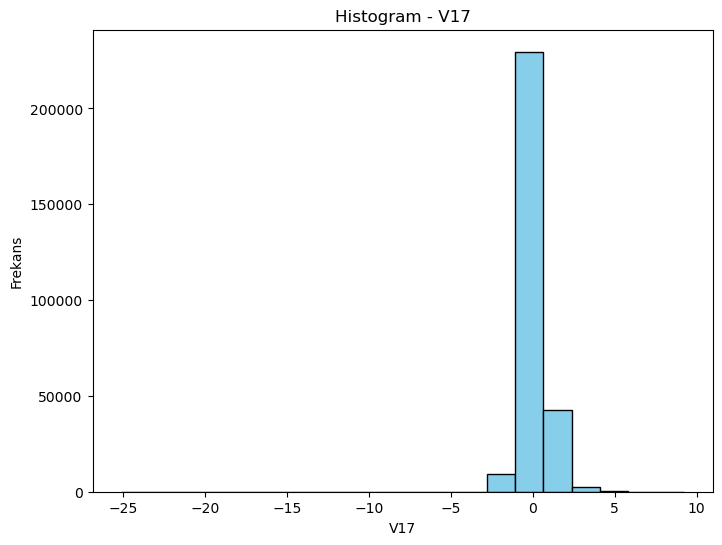

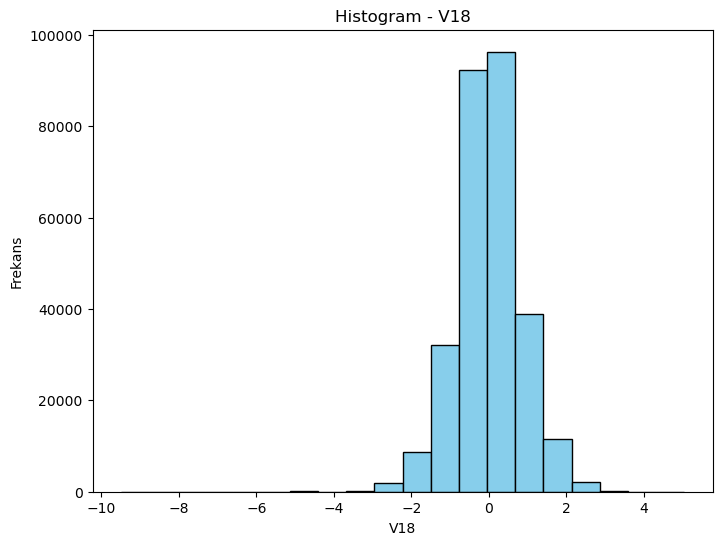

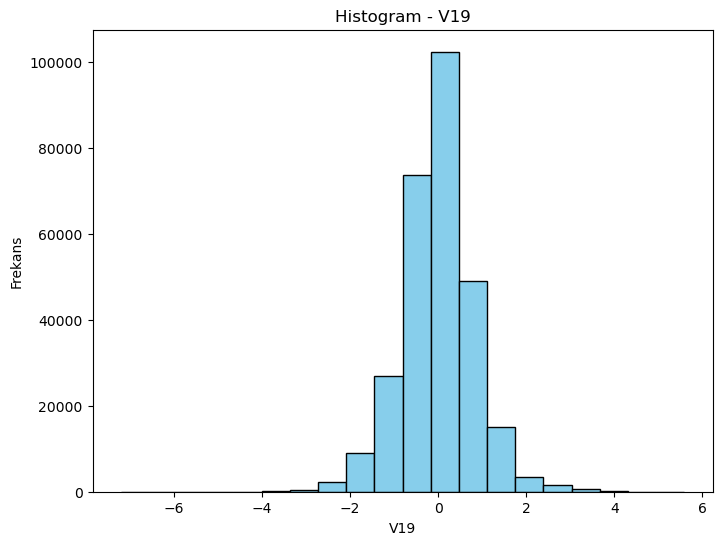

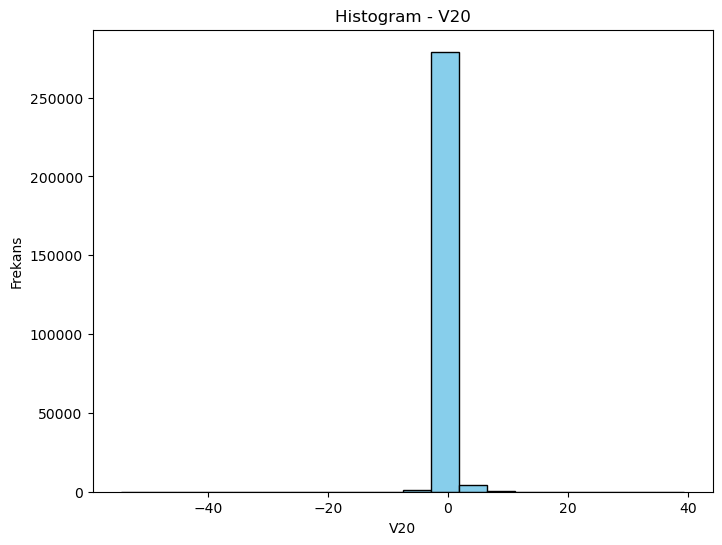

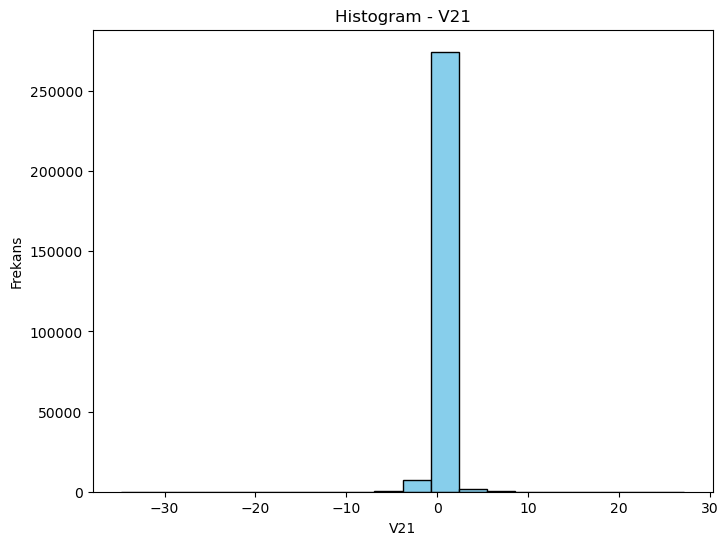

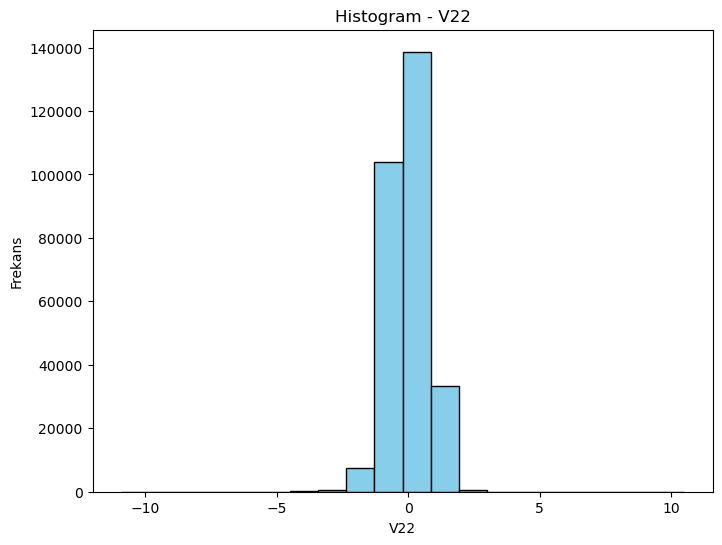

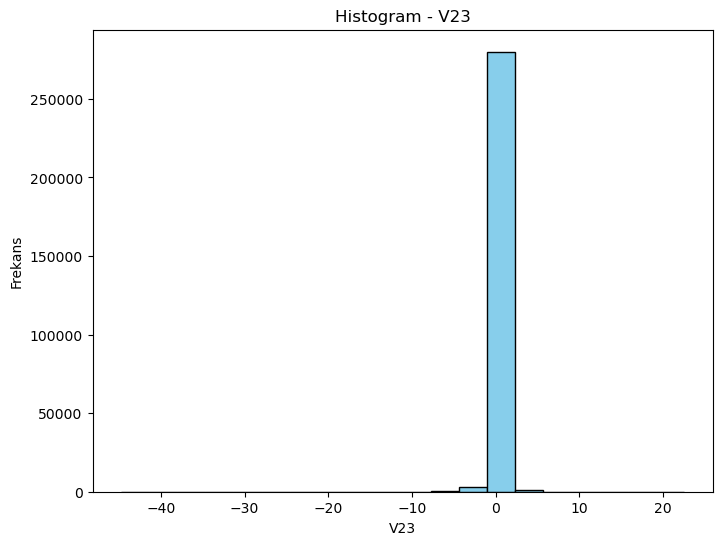

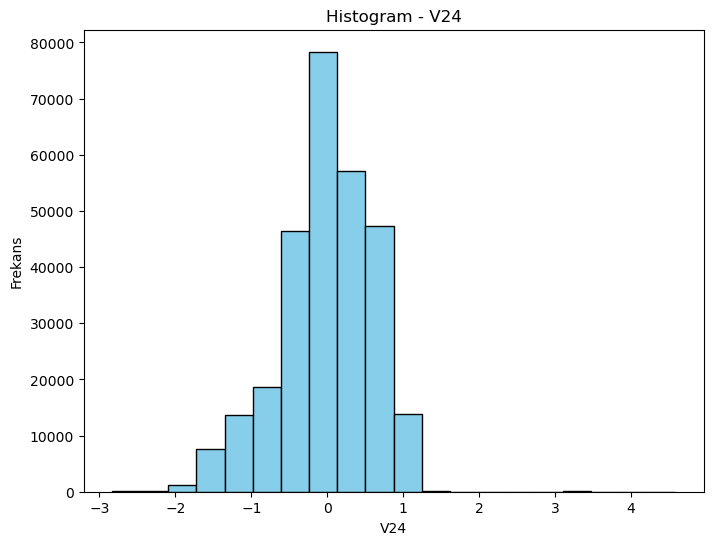

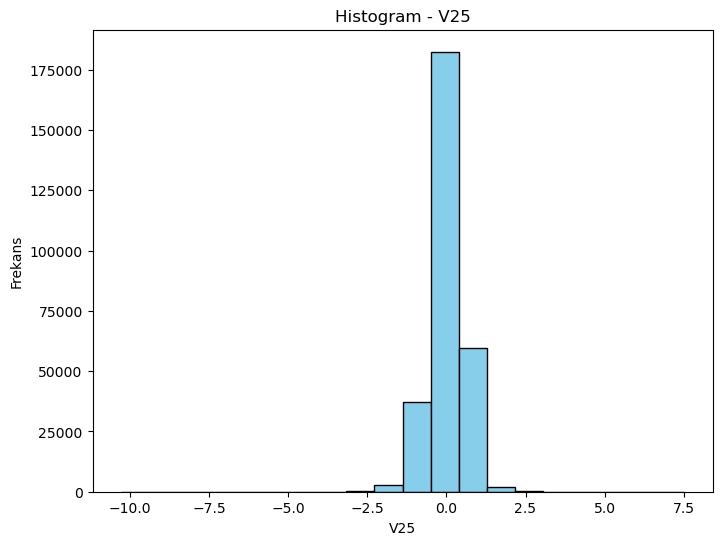

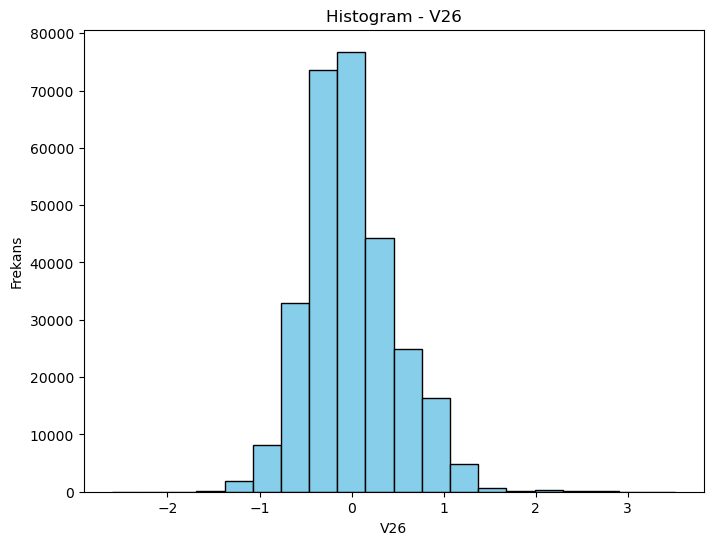

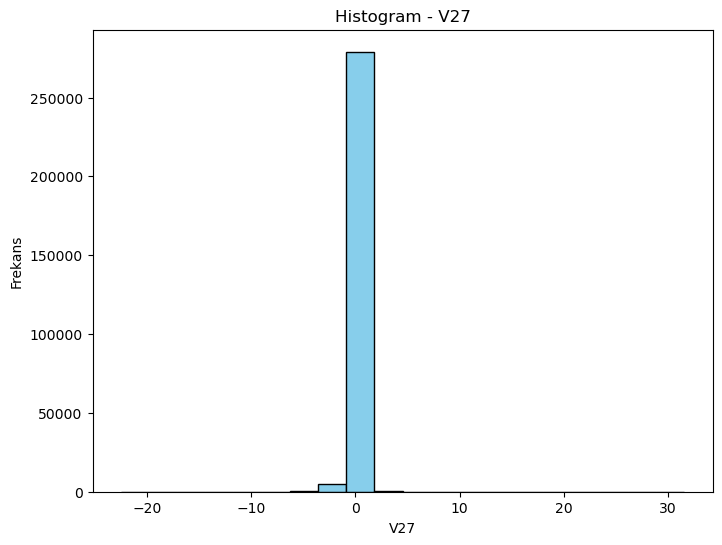

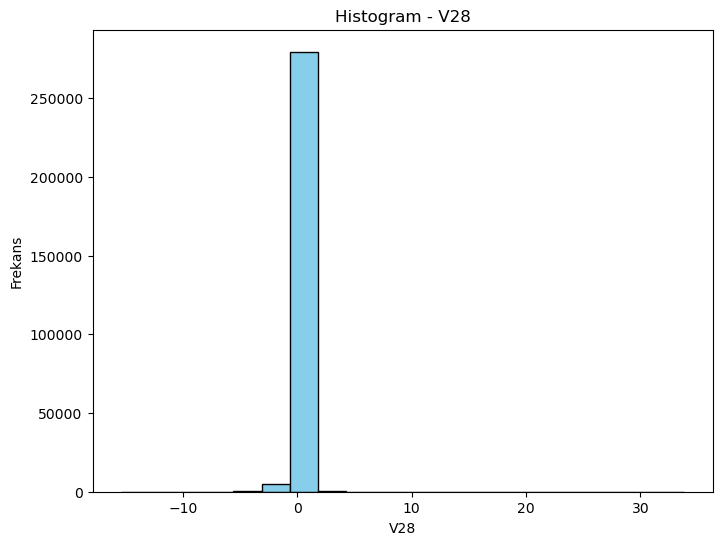

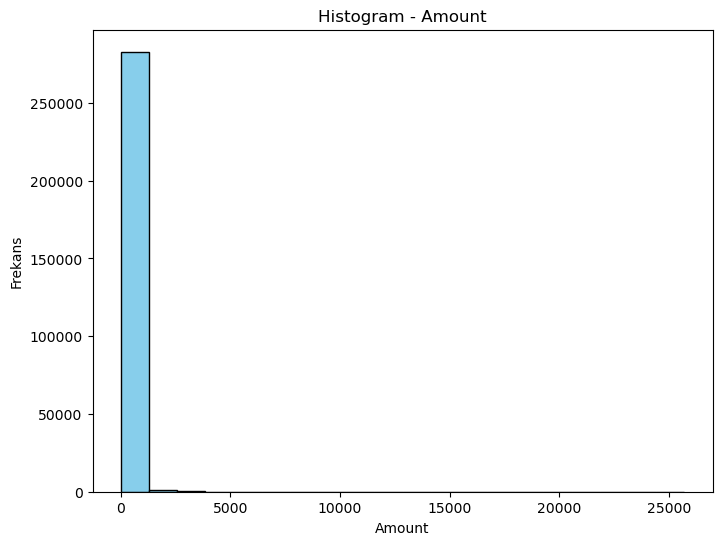

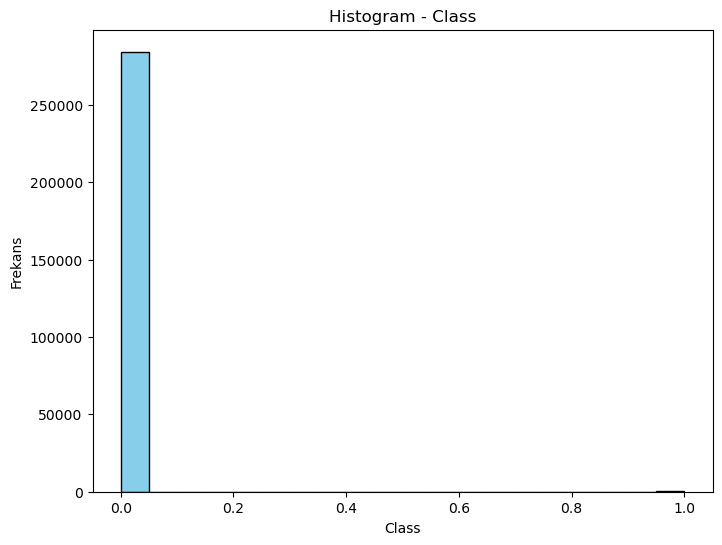

In [22]:
# normal dağılım ve görsel normallik testleri (histogram)
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram - {column}')
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.show()

In [6]:
df_train = df[:100000] # We cut in two the original dataset
df_train_1 = df_train[df_train['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train[df_train['Class'] == 0]
print('Number of Fraud Transaction = ' + str(len(df_train_1)))

df_sample=df_train_0.sample(len(df_train_1))

df_train = pd.concat([df_train_1, df_sample], ignore_index=True)

df_train.isnull().values.any()

Number of Fraud Transaction = 223


False

In [7]:
X_train = df_train.drop(['Time', 'Class'],axis=1)
y_train = df_train['Class']

df_test_all = df[100000:]

X_test = df_test_all.drop(['Time', 'Class'],axis=1)
y_test = df_test_all['Class']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(446, 29)
(446,)
(184807, 29)
(184807,)


In [8]:
svm_model1 = SVC(kernel='linear', C=0.1)
svm_model1.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [9]:
y_pred = svm_model1.predict(X_test)
accuracy_score(y_pred, y_test)*100

98.31067005037688

In [10]:
svm_model2 = SVC(kernel='linear', C=1)
svm_model2.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [11]:
y_pred = svm_model2.predict(X_test)
accuracy_score(y_pred, y_test)*100

98.51087891692414

In [12]:
svm_model3 = SVC(kernel='linear', C=10)
svm_model3.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [13]:
y_pred = svm_model3.predict(X_test)
accuracy_score(y_pred, y_test)*100

98.92969422153924

In [54]:
svm_model4 = SVC(kernel='linear', C=100)
svm_model4.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [55]:
y_pred = svm_model4.predict(X_test)
accuracy_score(y_pred, y_test)*100

97.53959536164756

In [56]:
svm_model5 = SVC(kernel='poly', degree=2, C=1)
svm_model5.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='poly')

In [57]:
y_pred = svm_model5.predict(X_test)
accuracy_score(y_pred, y_test)*100

99.83171633109136

In [58]:
svm_model6 = SVC(kernel='poly', degree=5, C=1)
svm_model6.fit(X_train, y_train)

SVC(C=1, degree=5, kernel='poly')

In [59]:
y_pred = svm_model6.predict(X_test)
accuracy_score(y_pred, y_test)*100

99.00112008744257

In [60]:
svm_model7 = SVC(kernel='poly', degree=5, C=0.5)
svm_model7.fit(X_train, y_train)

SVC(C=0.5, degree=5, kernel='poly')

In [61]:
y_pred = svm_model7.predict(X_test)
accuracy_score(y_pred, y_test)*100

99.15046507978595

In [62]:
svm_model8 = SVC(kernel='rbf', C=1)
svm_model8.fit(X_train, y_train)

SVC(C=1)

In [23]:
y_pred = svm_model8.predict(X_test)
accuracy_score(y_pred, y_test)*100

93.66582434648039

In [24]:
svm_model9 = SVC(kernel='rbf', C=0.1)
svm_model9.fit(X_train, y_train)

SVC(C=0.1)

In [25]:
y_pred = svm_model9.predict(X_test)
accuracy_score(y_pred, y_test)*100

92.92451043521078

In [26]:
svm_model10 = SVC(kernel='rbf', C=1, gamma="auto")
svm_model10.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [27]:
y_pred = svm_model10.predict(X_test)
accuracy_score(y_pred, y_test)*100

84.88152505045805

In [28]:
svm_model11 = SVC(kernel='rbf', C=0.1, gamma="auto")
svm_model11.fit(X_train, y_train)

SVC(C=0.1, gamma='auto')

In [29]:
y_pred = svm_model11.predict(X_test)
accuracy_score(y_pred, y_test)*100

55.77115585448603

In [30]:
X_train_10 = X_train.iloc[:, :10]
X_train_10.shape

(446, 10)

In [31]:
X_test_10 = X_test.iloc[:, :10]

In [32]:
svm_model1 = SVC(kernel='linear', C=0.1)
svm_model1.fit(X_train_10, y_train)

SVC(C=0.1, kernel='linear')

In [33]:
y_pred = svm_model1.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

97.37509942805197

In [34]:
svm_model2 = SVC(kernel='linear', C=1)
svm_model2.fit(X_train_10, y_train)

SVC(C=1, kernel='linear')

In [35]:
y_pred = svm_model2.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

97.1115812712722

In [36]:
svm_model3 = SVC(kernel='linear', C=10)
svm_model3.fit(X_train_10, y_train)

SVC(C=10, kernel='linear')

In [37]:
y_pred = svm_model3.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

97.11753342676414

In [38]:
svm_model4 = SVC(kernel='linear', C=100)
svm_model4.fit(X_train_10, y_train)

SVC(C=100, kernel='linear')

In [39]:
y_pred = svm_model4.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

97.07911496858885

In [40]:
svm_model5 = SVC(kernel='poly', degree=2, C=1)
svm_model5.fit(X_train_10, y_train)

SVC(C=1, degree=2, kernel='poly')

In [41]:
y_pred = svm_model5.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

99.51841651019713

In [42]:
svm_model6 = SVC(kernel='poly', degree=5, C=1)
svm_model6.fit(X_train_10, y_train)

SVC(C=1, degree=5, kernel='poly')

In [43]:
y_pred = svm_model6.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

99.7381051583544

In [44]:
svm_model7 = SVC(kernel='poly', degree=5, C=0.5)
svm_model7.fit(X_train_10, y_train)

SVC(C=0.5, degree=5, kernel='poly')

In [45]:
y_pred = svm_model7.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

99.77165367112718

In [46]:
svm_model8 = SVC(kernel='rbf', C=1)
svm_model8.fit(X_train_10, y_train)

SVC(C=1)

In [47]:
y_pred = svm_model8.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

97.95299961581541

In [48]:
svm_model9 = SVC(kernel='rbf', C=0.1)
svm_model9.fit(X_train_10, y_train)

SVC(C=0.1)

In [49]:
y_pred = svm_model9.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

98.6044900896611

In [50]:
svm_model10 = SVC(kernel='rbf', C=1, gamma="auto")
svm_model10.fit(X_train_10, y_train)

SVC(C=1, gamma='auto')

In [51]:
y_pred = svm_model10.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

89.87267798297684

In [52]:
svm_model11 = SVC(kernel='rbf', C=0.1, gamma="auto")
svm_model11.fit(X_train_10, y_train)

SVC(C=0.1, gamma='auto')

In [53]:
y_pred = svm_model11.predict(X_test_10)
accuracy_score(y_pred, y_test)*100

72.83328012467061